In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew, kurtosis, norm

In [2]:
df = pd.read_csv('household_data.csv')

## Task - 3 Identify Data Type (Numerical & Categorical) ##

In [3]:
print("Data types of each columns in dataset : ")
print(df.dtypes)

Data types of each columns in dataset : 
Household_ID               str
Age_of_Household_Head    int64
Education_Level            str
Family_Size              int64
Owns_House                 str
Urban_Rural                str
Household_Income         int64
dtype: object


In [5]:
Numerical_Columns = ["Age_of_Household_Head", "Family_Size", "Household_Income"]
Categorical_Columns = ["Education_Level", "Owns_House", "Urban_Rural"]

print("\nNumerical Columns : ")
for col in Numerical_Columns:
    print(col)
    
print("\nCategorical Columns : ")
for col in Categorical_Columns:
    print(col)


Numerical Columns : 
Age_of_Household_Head
Family_Size
Household_Income

Categorical Columns : 
Education_Level
Owns_House
Urban_Rural


## Task - 4 Central Tendency ##

In [ ]:
# Mean, Median, Mode of Household Income:- 

Mean_Income = np.mean(df["Household_Income"])
Median_Income = np.median(df["Household_Income"])
Mode_Income = df["Household_Income"].mode()[0]

print("Mean Income :", Mean_Income)
print("Median Income :", Median_Income)
print("Mode Income :", Mode_Income) 


Mean Income: 52584.81333333333
Median Income: 51684.0
Mode Income: 14050


In [8]:
# Mean, Median, Mode of Age :- 

Mean_Age = np.mean(df["Age_of_Household_Head"])
Median_Age = np.median(df["Age_of_Household_Head"])
Mode_Age = df["Age_of_Household_Head"].mode()[0]

print("Mean Age :", Mean_Age)
print("Median Age :", Median_Age)
print("Mode Age :", Mode_Age)

Mean Age : 47.406666666666666
Median Age : 46.0
Mode Age : 45


# Interpretaion Of Central Tendency #

### Household Income ###

The mean household income is 52,584.81, while the median income is 51,684. Since the mean is slightly higher than the median, it indicates that the income distribution is slightly positively skewed. This means that a few households have higher incomes which increase the average value. The mode income is 14,050, which is the most frequently occurring income in the dataset.

### Age Of Household ###

The mean age of the household head is 47.40 years, and the median age is 46 years. Since the mean and median are close to each other, the age distribution appears to be fairly symmetrical. The mode age is 45 years, which means most household heads are around this age group.

## Task - 5 Measures of Dispersion 

In [15]:
Range_Income = np.max(df["Household_Income"]) - np.min(df["Household_Income"])
Variance_Income = np.var(df["Household_Income"])
StandardDeviation_Income = np.std(df["Household_Income"])

print("Range Income:", Range_Income)
print("Variance Income:", Variance_Income)
print("Standard Deviation Income:", StandardDeviation_Income)


# IQR - InterQ@uartileRange :- 

Q1 = np.percentile(df["Household_Income"], 25)
Q3 = np.percentile(df["Household_Income"], 75)
IQR_Income = Q3 - Q1

print("\nIQR Income :", IQR_Income)

Range Income: 88288
Variance Income: 568035228.8984889
Standard Deviation Income: 23833.489650038427

IQR Income : 35377.0


## Interpretation Of IQR and Income Spread ##

The Interquartile Range (IQR) of household income is 35,377. This means that the middle 50% of households have incomes within a range of 35,377. It shows that there is a moderate spread in the income levels of most households.

# Task - 6 Distribution #

## Histogram Of Household Income ##

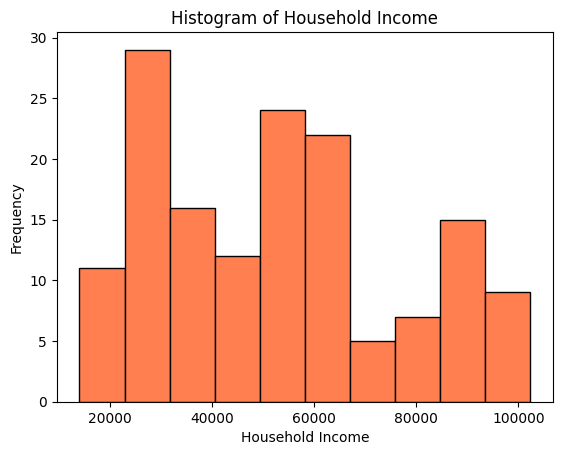

In [24]:
plt.hist(df["Household_Income"], bins=10, color="coral", edgecolor="black", linewidth=1)
plt.title("Histogram of Household Income")
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.show()

## Gaussian (Normal) Distribution Curve ##

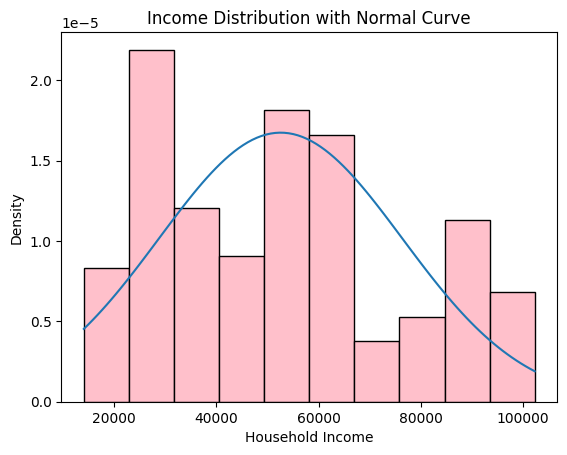

In [29]:
mean_income = np.mean(df["Household_Income"])
std_income = np.std(df["Household_Income"])

x = np.linspace(min(df["Household_Income"]), 
                max(df["Household_Income"]), 100)

y = norm.pdf(x, mean_income, std_income)

plt.hist(df["Household_Income"], bins=10, color="Pink", edgecolor="black", linewidth=1, density=True)
plt.plot(x, y)
plt.title("Income Distribution with Normal Curve")
plt.xlabel("Household Income")
plt.ylabel("Density")
plt.show()


## Skewness & Kurtosis ##

In [30]:
Skew_Income = skew(df["Household_Income"])
Kurtosis_Income = kurtosis(df["Household_Income"])

print("Skewness:", Skew_Income)
print("Kurtosis:", Kurtosis_Income)

Skewness: 0.42004188363074385
Kurtosis: -0.9130223599990464


### Interpretation Of Distribution ###

The histogram shows how the household income is spread in the dataset. The normal curve helps us see whether the data looks like a normal distribution.
The skewness value is 0.420, which is positive. This means the income data is slightly right-skewed. It shows that some households have higher income compared to others, but overall the data is almost balanced.
The kurtosis value is -0.913, which means the graph is a little flatter than a normal distribution.
Overall, the income distribution is close to normal with a slight right side increase.

## Task - 7 Data Categorization ##

<Figure size 800x500 with 0 Axes>

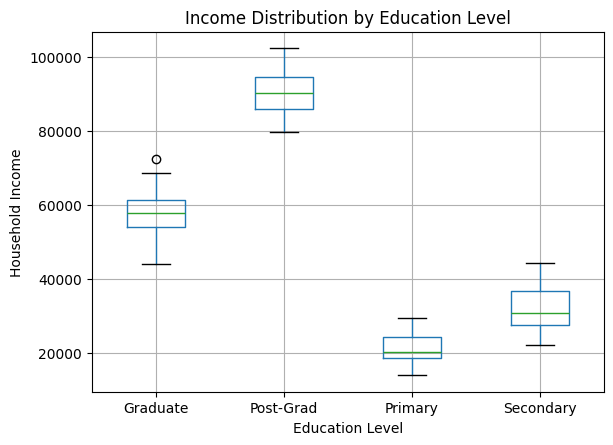

In [31]:
plt.figure(figsize=(8,5))

df.boxplot(column="Household_Income", by="Education_Level")

plt.title("Income Distribution by Education Level")
plt.suptitle("")
plt.xlabel("Education Level")
plt.ylabel("Household Income")

plt.show()

## Visualizations ##

### Histogram + KDE Plot - (Family Size) ###

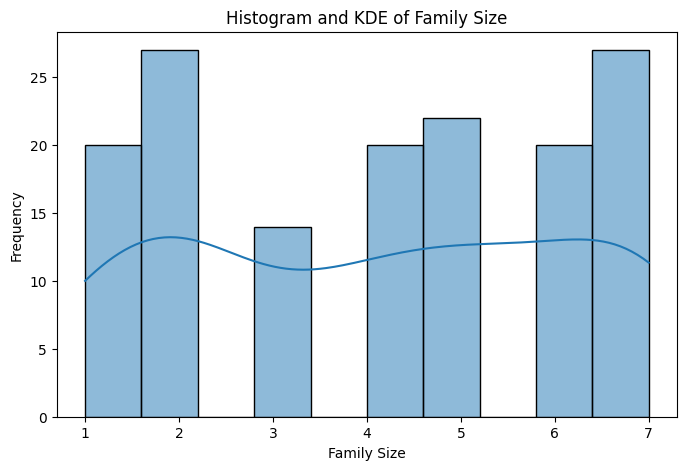

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(df["Family_Size"], 
             bins=10, 
             kde=True)

plt.title("Histogram and KDE of Family Size")
plt.xlabel("Family Size")
plt.ylabel("Frequency")

plt.show()


## Distribution Curve: Age vs Income ##

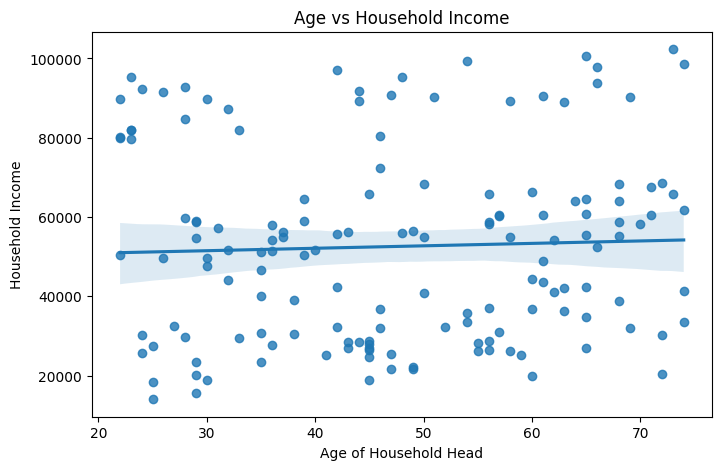

In [34]:
plt.figure(figsize=(8,5))

sns.regplot(x="Age_of_Household_Head", 
            y="Household_Income", 
            data=df)

plt.title("Age vs Household Income")
plt.xlabel("Age of Household Head")
plt.ylabel("Household Income")

plt.show()
